In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   

# Packages
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

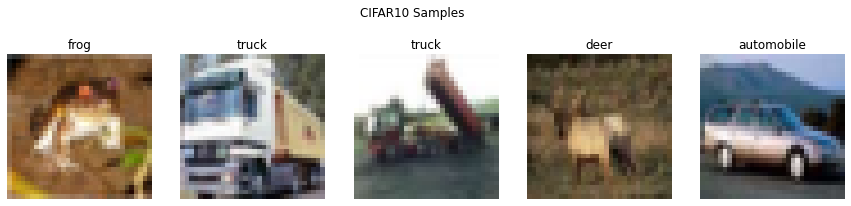

In [ ]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Visualize some samples
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (15, 3.5))
fig.suptitle('CIFAR10 Samples')

ax1.imshow(X_train[0])
ax1.set_title(cifar_classes[y_train[0][0]])
ax1.axis('off')
ax2.imshow(X_train[1])
ax2.set_title(cifar_classes[y_train[1][0]])
ax2.axis('off')
ax3.imshow(X_train[2])
ax3.set_title(cifar_classes[y_train[2][0]])
ax3.axis('off')
ax4.imshow(X_train[3])
ax4.set_title(cifar_classes[y_train[3][0]])
ax4.axis('off')
ax5.imshow(X_train[4])
ax5.set_title(cifar_classes[y_train[4][0]])
ax5.axis('off')
plt.show()

## Data preparation

In [ ]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

X_train_norm = X_train/255.0
X_test_norm = X_test/255.0

Epoch 1/50
196/196 [==============================] - 7s 23ms/step - loss: 2.2318 - accuracy: 0.1844 - val_loss: 2.1449 - val_accuracy: 0.2267
Epoch 2/50
196/196 [==============================] - 3s 16ms/step - loss: 2.0521 - accuracy: 0.2715 - val_loss: 1.9698 - val_accuracy: 0.3109
Epoch 3/50
196/196 [==============================] - 3s 16ms/step - loss: 1.9322 - accuracy: 0.3198 - val_loss: 1.8937 - val_accuracy: 0.3360
Epoch 4/50
196/196 [==============================] - 3s 16ms/step - loss: 1.8729 - accuracy: 0.3445 - val_loss: 1.8429 - val_accuracy: 0.3546
Epoch 5/50
196/196 [==============================] - 3s 16ms/step - loss: 1.8253 - accuracy: 0.3621 - val_loss: 1.8029 - val_accuracy: 0.3647
Epoch 6/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7786 - accuracy: 0.3791 - val_loss: 1.7635 - val_accuracy: 0.3804
Epoch 7/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7333 - accuracy: 0.3962 - val_loss: 1.7070 - val_accuracy: 0.4032

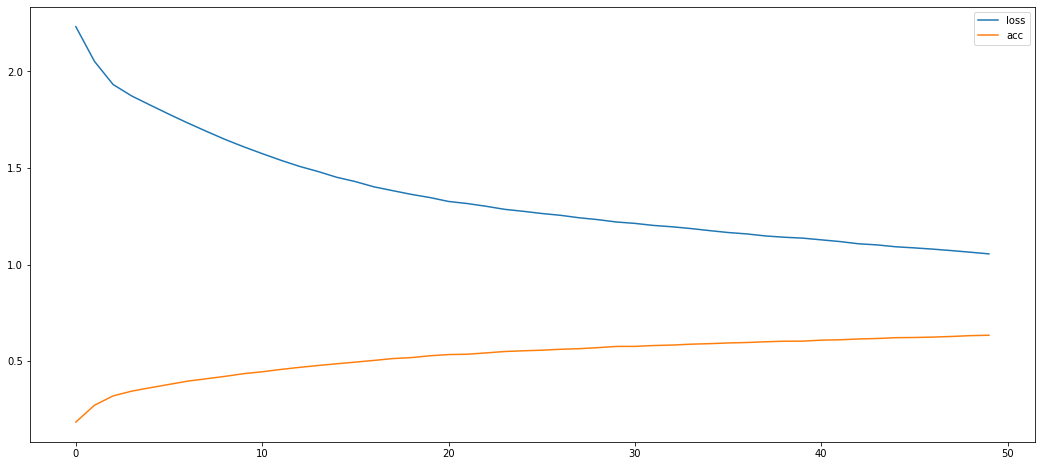

In [ ]:
model = models.Sequential()

# Images size and channels!
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape='_____'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))   # Down-samples the feature space
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_norm, y_train_encoded, validation_data = (X_test_norm, y_test_encoded), batch_size = 256, epochs = 50)


plt.figure(figsize = (18, 8))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='acc')
plt.legend()
plt.show()

Epoch 1/50
782/782 [==============================] - 10s 12ms/step - loss: 2.0539 - accuracy: 0.2589 - val_loss: 1.8303 - val_accuracy: 0.3621
Epoch 2/50
782/782 [==============================] - 9s 11ms/step - loss: 1.7262 - accuracy: 0.3903 - val_loss: 1.5917 - val_accuracy: 0.4267
Epoch 3/50
782/782 [==============================] - 9s 12ms/step - loss: 1.5411 - accuracy: 0.4535 - val_loss: 1.5152 - val_accuracy: 0.4523
Epoch 4/50
782/782 [==============================] - 9s 11ms/step - loss: 1.4317 - accuracy: 0.4922 - val_loss: 1.3971 - val_accuracy: 0.4974
Epoch 5/50
782/782 [==============================] - 9s 12ms/step - loss: 1.3409 - accuracy: 0.5238 - val_loss: 1.3216 - val_accuracy: 0.5305
Epoch 6/50
782/782 [==============================] - 9s 12ms/step - loss: 1.2720 - accuracy: 0.5498 - val_loss: 1.2699 - val_accuracy: 0.5480
Epoch 7/50
782/782 [==============================] - 9s 12ms/step - loss: 1.2201 - accuracy: 0.5697 - val_loss: 1.2339 - val_accuracy: 0.564

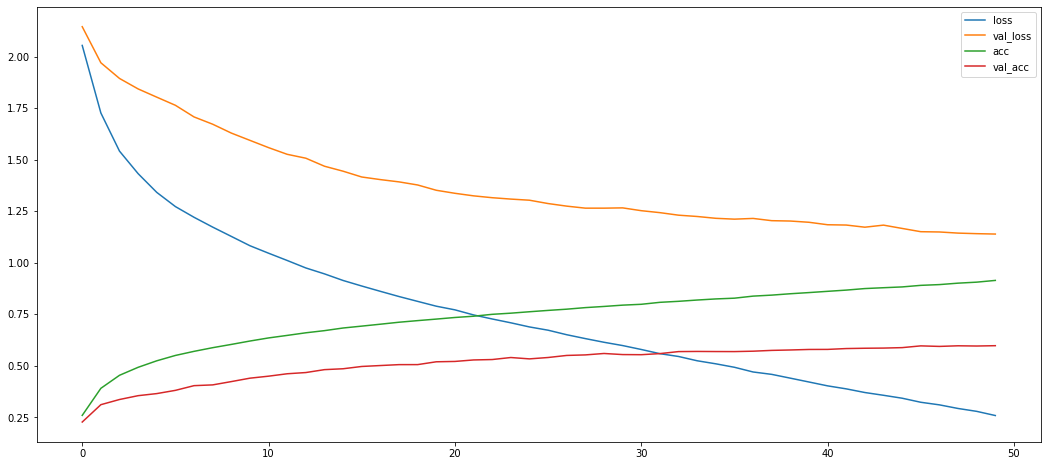

In [ ]:
model_deeper = models.Sequential()

# double convolution layers
model_deeper.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)))
model_deeper.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model_deeper.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))   
model_deeper.add(tf.keras.layers.Flatten())
model_deeper.add(tf.keras.layers.Dense(32, activation = 'relu'))
model_deeper.add(tf.keras.layers.Dense(10, activation='softmax'))

opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model_deeper.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history_deep = model_deeper.fit(X_train_norm, y_train_encoded, validation_data = (X_test_norm, y_test_encoded), batch_size = 64, epochs = 50)


plt.figure(figsize = (18, 8))
plt.plot(history_deep.history['loss'], label='loss - deep')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history_deep.history['accuracy'], label='acc - deep')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()